# Introduction to Machine Learning

## DSC 340 Week 1 Slides

[Dr. Julie Butler](juliebutler.org)


August 28 - September 1, 2023


## Plans for the Week

### Monday
* Lecture: "Linear Regression and the Machine Learning Workflow"
* Week 1 In-Class Assignment and Week 2 Pre-Class Due
* Suggested Reading: Hands-On Chapter 2 and Chapter 4 (only about linear regression)

### Wednesday 
* Finish "Linear Regression and the Machine Learning Workflow"
* Start In-Class Assignment: Revisting Nuclear Binding Energies with Linear Regression
* Week 1 Post-Class Due
* Suggested Reading: Hands-On Chapter 2 and Chapter 4 (only about linear regression)

### Friday
* Finish In-Class Assignment: Revisting Nuclear Binding Energies with Linear Regression
* Suggested Reading: Hands-On Chapter 2 and Chapter 4 (only about linear regression)

# Part 1: Linear Regression

In [89]:
##############################
##          IMPORTS         ##
##############################
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

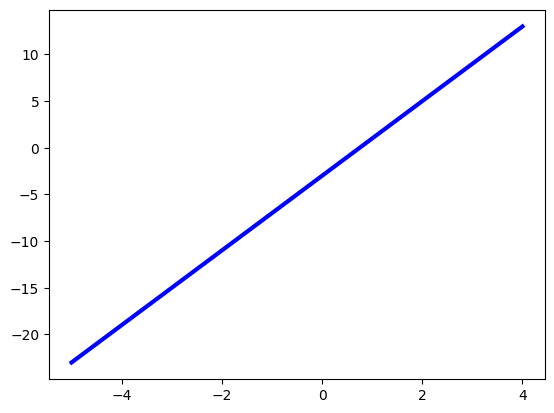

In [90]:
X = np.arange(-5,5)
y = 4*X-3

plt.plot(X,y, color='blue',linewidth=3)

In [91]:
linear_regression = LinearRegression()

X = X.reshape(-1,1)

linear_regression.fit(X,y)

LinearRegression()

In [92]:
X_test = np.arange(-10,10,0.1)
y_test = 4*X_test-3

X_test = X_test.reshape(-1,1)

y_pred = linear_regression.predict(X_test)

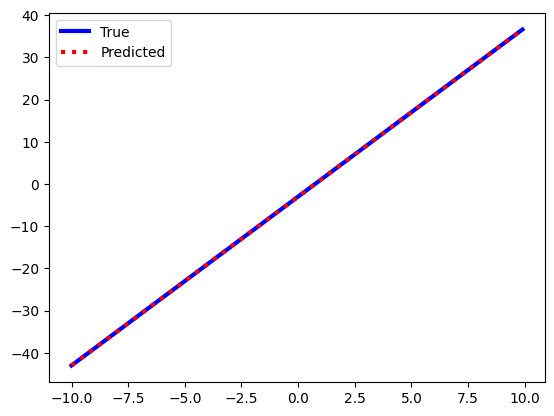

In [93]:
plt.plot(X_test,y_test,color='blue',linewidth=3,label="True")
plt.plot(X_test, y_pred, color='red', linewidth=3,linestyle=':', label="Predicted")
plt.legend()

In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
print("MEAN SQUARED ERROR:", mean_squared_error(y_test, y_pred))
print("ROOT MEAN SQUARED ERROR:", np.sqrt(mean_squared_error(y_test, y_pred)))

MEAN SQUARED ERROR: 1.7369681753028576e-28
ROOT MEAN SQUARED ERROR: 1.3179408846009966e-14


In [96]:
print("LINEAR REGRESSION SLOPE:", linear_regression.coef_)
print("LINEAR REGRESSION INTERCEPT:", linear_regression.intercept_)

LINEAR REGRESSION SLOPE: [4.]
LINEAR REGRESSION INTERCEPT: -3.000000000000001


# Part 2: The Machine Learning Workflow with Linear Regression

## The Machine Learning Workflow

* General Steps of any machine learning analysis:
    * Import the data set, perform an initial analysis
    * Split the data into a training set and a test set
    * Train the machine learning algorithm with the training set
    * Test the performance of the trained model with the test set using numerical metrics and visual analysis
    * (Optional) Improve the performance of the algorithm by either reformatting the data OR changing the parameters of the machine learning algorithm

* Helpful Checklist: Appendix B

In [104]:
datasets.load_diabetes().feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [105]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

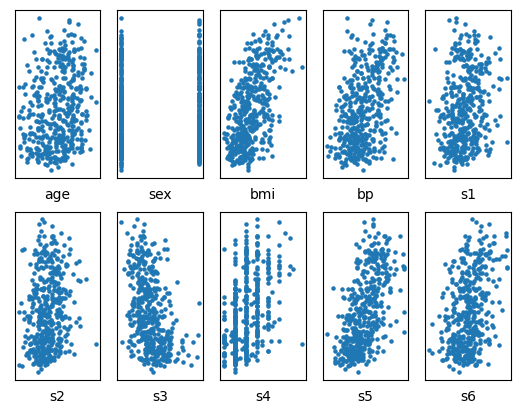

In [106]:
fig, axs = plt.subplots(2,5)
k = 0
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(diabetes_X[:,k], diabetes_y, s=5)
        axs[i][j].set_xlabel(datasets.load_diabetes().feature_names[k])
        k += 1
        axs[i][j].set_yticks(())
        axs[i][j].set_xticks(())

In [107]:
bp = diabetes_X[:,3]
blood_sugar = diabetes_X[:,-1]
diabetes_X = np.array([bp,blood_sugar]).T

In [108]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2)

In [109]:
# Create linear regression object
linear_regression = LinearRegression()

# Train the model using the training sets
linear_regression.fit(X_train, y_train)

LinearRegression()

In [110]:
# Make predictions using the testing set
y_pred = linear_regression.predict(X_test)

In [113]:
# The coefficients
print("Coefficients:", linear_regression.coef_, linear_regression.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("R2-Score: %.2f" % r2_score(y_test, y_pred))

Coefficients: [553.46403259 408.76726778] 151.97189849921725
Mean squared error: 4191.56
Root mean squared error: 64.74
R2-Score: 0.26


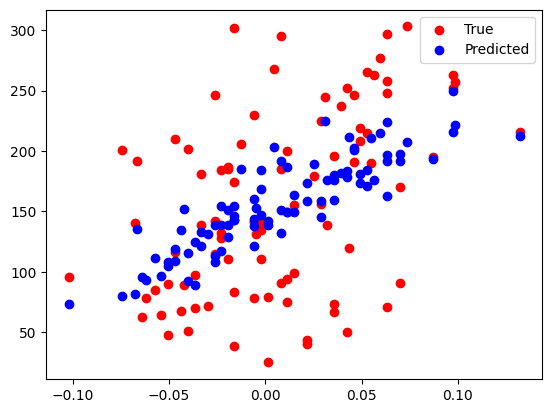

In [112]:
# Plot outputs
plt.scatter(X_test[:,0], y_test, color="red", label="True")
plt.scatter(X_test[:,0], y_pred, color="blue", label="Predicted")
plt.legend()